In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('/Users/thejvaibhavnaruboyina/Documents/Netflix-Data-Analysis/data/netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [6]:
df = df.dropna(subset=['director','country'])

In [7]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

In [10]:
df.info()
df.to_csv('../data/netflix_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  genres        8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 755.5+ KB


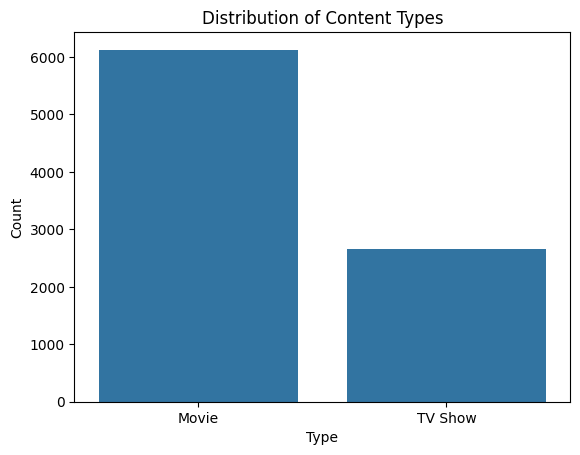

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('../visuals/type_distribution.png')
plt.show()


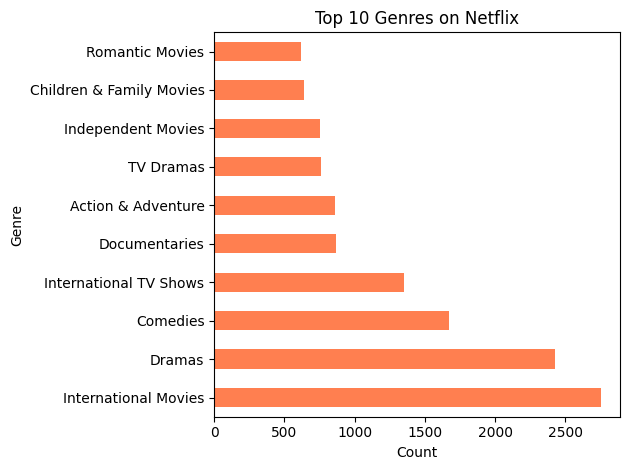

In [13]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(df['genres'], [])
top_genres = pd.Series(all_genres).value_counts().head(10)

top_genres.plot(kind='barh', color='coral')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('../visuals/top_genres.png')
plt.show()


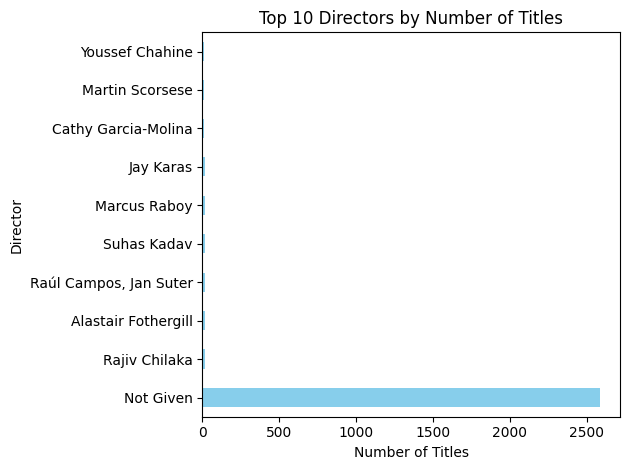

In [18]:
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', color='skyblue')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.savefig('../visuals/top_directors.png')
plt.show()


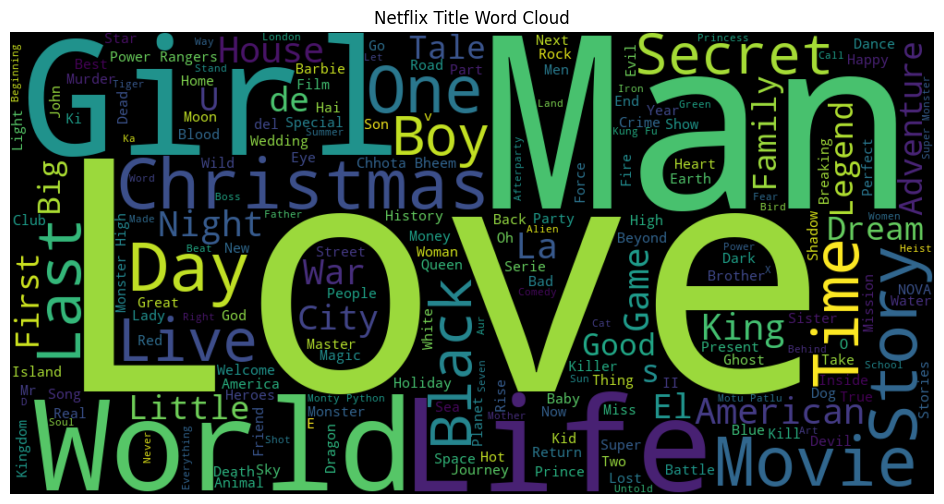

In [19]:
from wordcloud import WordCloud

titles = ' '.join(df['title'])
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(titles)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Title Word Cloud')
plt.savefig('../visuals/title_wordcloud.png')
plt.show()


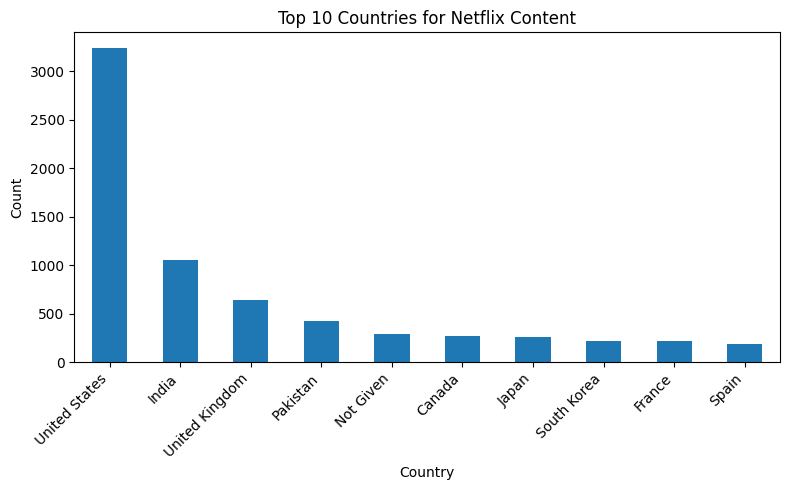

In [23]:
plt.figure(figsize=(8,5))
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries for Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/top_countries.png')
plt.show()


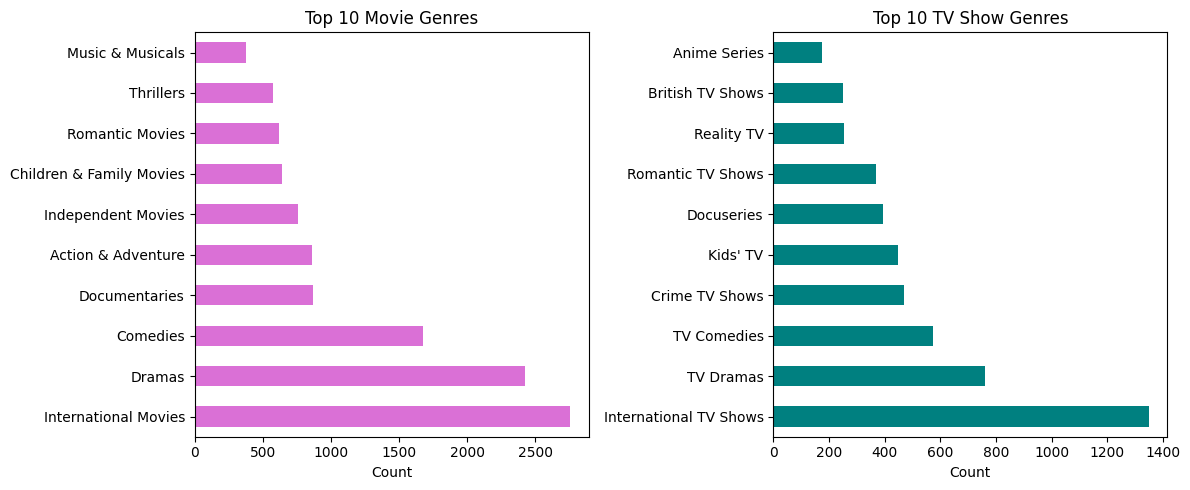

In [22]:
movie_genres = sum(df[df['type']=='Movie']['genres'], [])
show_genres  = sum(df[df['type']=='TV Show']['genres'], [])
mg = pd.Series(movie_genres).value_counts().head(10)
sg = pd.Series(show_genres).value_counts().head(10)

fig, axes = plt.subplots(1,2,figsize=(12,5))
mg.plot(kind='barh', ax=axes[0], color='orchid'); axes[0].set_title('Top 10 Movie Genres')
sg.plot(kind='barh', ax=axes[1], color='teal');   axes[1].set_title('Top 10 TV Show Genres')
for ax in axes: ax.set_xlabel('Count')
plt.tight_layout()
plt.savefig('../visuals/movie_vs_show_genres.png')
plt.show()


In [ ]:
git add visuals/*.png